In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import datetime
from datetime import datetime, date

In [4]:
data = pd.read_csv("prices10.csv", parse_dates=['Date'])


In [5]:
data[:5]

,Date,AAPL,CVX,IBM,XOM,GS,BA,MON,TEVA,CME
0,2007-01-03,80.10,55.48,85.07,62.22,185.03,74.52,46.73,27.20,83.93
1,2007-01-04,81.88,54.94,85.98,61.06,183.30,74.82,45.92,27.53,84.54
2,2007-01-05,81.29,55.15,85.20,61.49,183.49,74.50,46.31,28.02,84.94
3,2007-01-08,81.69,55.86,86.50,61.00,187.80,74.32,45.70,28.61,85.84
4,2007-01-09,88.48,55.21,87.52,60.53,188.12,73.54,45.39,28.55,86.34


In [6]:
Date_col = data.pop('Date')

In [7]:
data[:5]

,AAPL,CVX,IBM,XOM,GS,BA,MON,TEVA,CME
0,80.10,55.48,85.07,62.22,185.03,74.52,46.73,27.20,83.93
1,81.88,54.94,85.98,61.06,183.30,74.82,45.92,27.53,84.54
2,81.29,55.15,85.20,61.49,183.49,74.50,46.31,28.02,84.94
3,81.69,55.86,86.50,61.00,187.80,74.32,45.70,28.61,85.84
4,88.48,55.21,87.52,60.53,188.12,73.54,45.39,28.55,86.34


In [9]:
Date_col[:5]

0   2007-01-03
1   2007-01-04
2   2007-01-05
3   2007-01-08
4   2007-01-09
Name: Date, dtype: datetime64[ns]

In [10]:
close_px = data.copy()

In [11]:
close_px.index = Date_col
close_px[:5]

,AAPL,CVX,IBM,XOM,GS,BA,MON,TEVA,CME
Date,,,,,,,,,
2007-01-03,80.10,55.48,85.07,62.22,185.03,74.52,46.73,27.20,83.93
2007-01-04,81.88,54.94,85.98,61.06,183.30,74.82,45.92,27.53,84.54
2007-01-05,81.29,55.15,85.20,61.49,183.49,74.50,46.31,28.02,84.94
2007-01-08,81.69,55.86,86.50,61.00,187.80,74.32,45.70,28.61,85.84
2007-01-09,88.48,55.21,87.52,60.53,188.12,73.54,45.39,28.55,86.34


# Plotting time-series prices

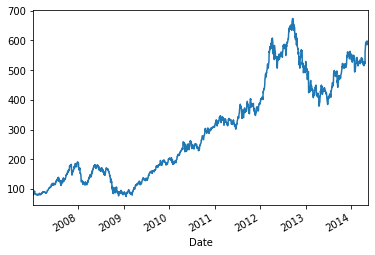

In [12]:
close_px.AAPL.plot()

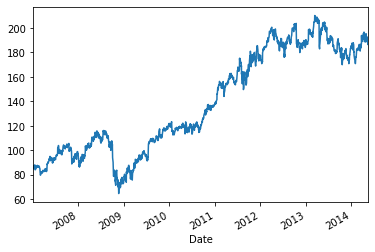

In [13]:
close_px['IBM'].plot()

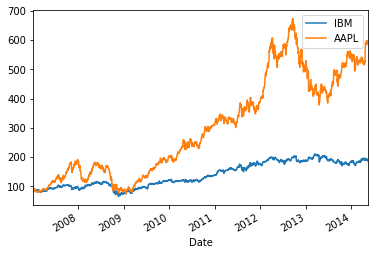

In [14]:
close_px[['IBM','AAPL']].plot()

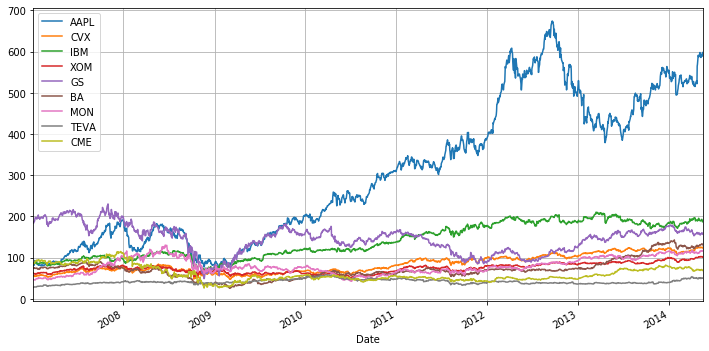

In [15]:
close_px.plot(figsize=(12,6))
plt.grid()

# daily change

In [16]:
net_returns = data / data.shift(1)-1
net_returns[:5]

,AAPL,CVX,IBM,XOM,GS,BA,MON,TEVA,CME
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.022222,-0.009733,0.010697,-0.018644,-0.009350,0.004026,-0.017334,0.012132,0.007268
2,-0.007206,0.003822,-0.009072,0.007042,0.001037,-0.004277,0.008493,0.017799,0.004731
3,0.004921,0.012874,0.015258,-0.007969,0.023489,-0.002416,-0.013172,0.021056,0.010596
4,0.083119,-0.011636,0.011792,-0.007705,0.001704,-0.010495,-0.006783,-0.002097,0.005825


In [17]:
daily_pc = net_returns.copy()

In [18]:
daily_pc.index = Date_col


In [22]:
daily_pc[:5]

,AAPL,CVX,IBM,XOM,GS,BA,MON,TEVA,CME
Date,,,,,,,,,
2007-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-04,0.022222,-0.009733,0.010697,-0.018644,-0.009350,0.004026,-0.017334,0.012132,0.007268
2007-01-05,-0.007206,0.003822,-0.009072,0.007042,0.001037,-0.004277,0.008493,0.017799,0.004731
2007-01-08,0.004921,0.012874,0.015258,-0.007969,0.023489,-0.002416,-0.013172,0.021056,0.010596
2007-01-09,0.083119,-0.011636,0.011792,-0.007705,0.001704,-0.010495,-0.006783,-0.002097,0.005825


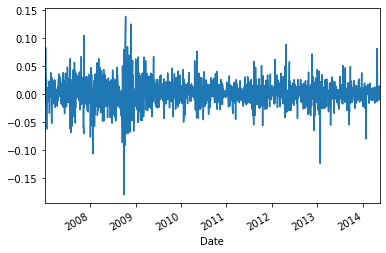

In [19]:
daily_pc["AAPL"].plot()

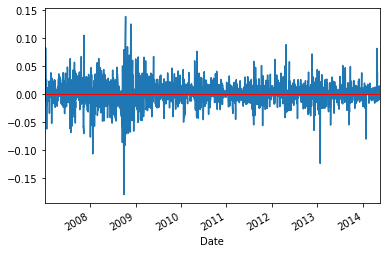

In [25]:
daily_pc["AAPL"].plot()
plt.axhline(linewidth=1,color='r')

# daily cumulative returns

In [26]:
df1 = 1+net_returns.iloc[1:5,0:2]
df1

,AAPL,CVX
1,1.022222,0.990267
2,0.992794,1.003822
3,1.004921,1.012874
4,1.083119,0.988364


In [27]:
df1.cumsum()

,AAPL,CVX
1,1.022222,0.990267
2,2.015017,1.994089
3,3.019937,3.006963
4,4.103056,3.995327


In [28]:
df1.cumprod()

,AAPL,CVX
1,1.022222,0.990267
2,1.014856,0.994052
3,1.019850,1.006849
4,1.104619,0.995133


In [30]:
gross_returns = (1+net_returns).cumprod()
gross_returns[:5]

,AAPL,CVX,IBM,XOM,GS,BA,MON,TEVA,CME
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.022222,0.990267,1.010697,0.981356,0.990650,1.004026,0.982666,1.012132,1.007268
2,1.014856,0.994052,1.001528,0.988267,0.991677,0.999732,0.991012,1.030147,1.012034
3,1.019850,1.006849,1.016810,0.980392,1.014971,0.997316,0.977958,1.051838,1.022757
4,1.104619,0.995133,1.028800,0.972838,1.016700,0.986849,0.971325,1.049632,1.028714


In [32]:
daily_cr = gross_returns.copy()

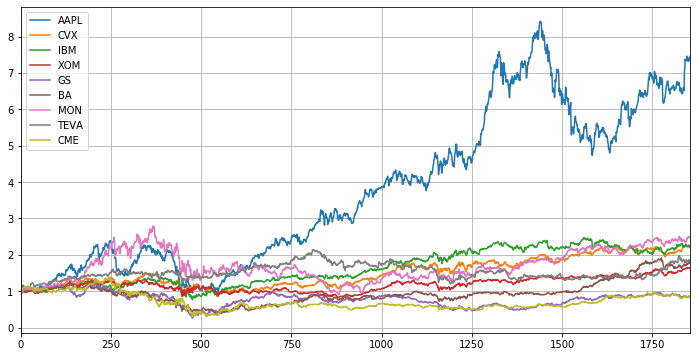

In [33]:
daily_cr.plot(figsize=(12,6))
plt.grid()

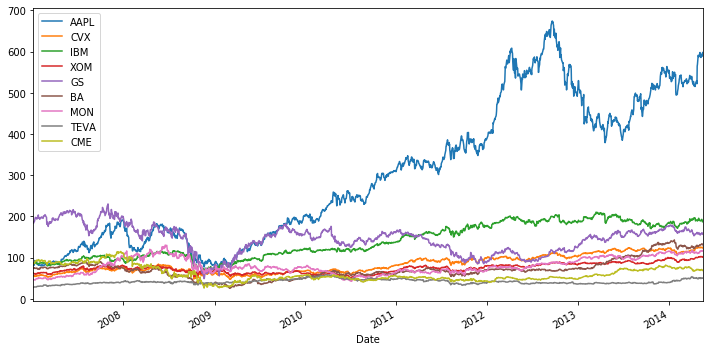

In [34]:
close_px.plot(figsize=(12,6))

# monthly data

In [35]:
monthly = close_px.asfreq('M')
monthly[:5]

,AAPL,CVX,IBM,XOM,GS,BA,MON,TEVA,CME
Date,,,,,,,,,
2007-01-31,81.94,56.97,86.72,62.22,195.90,74.84,49.81,30.54,90.40
2007-02-28,80.87,53.95,81.53,60.44,186.29,73.20,47.66,31.02,86.53
2007-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-04-30,95.39,61.25,89.66,66.93,202.18,78.02,53.46,33.41,83.06
2007-05-31,115.84,64.63,93.88,70.43,213.47,84.70,55.82,34.28,85.35


In [36]:
monthly = close_px.asfreq('M').ffill()
monthly[:5]

,AAPL,CVX,IBM,XOM,GS,BA,MON,TEVA,CME
Date,,,,,,,,,
2007-01-31,81.94,56.97,86.72,62.22,195.90,74.84,49.81,30.54,90.40
2007-02-28,80.87,53.95,81.53,60.44,186.29,73.20,47.66,31.02,86.53
2007-03-31,80.87,53.95,81.53,60.44,186.29,73.20,47.66,31.02,86.53
2007-04-30,95.39,61.25,89.66,66.93,202.18,78.02,53.46,33.41,83.06
2007-05-31,115.84,64.63,93.88,70.43,213.47,84.70,55.82,34.28,85.35


In [37]:
monthly_pc = monthly / monthly.shift(1) - 1
monthly_pc[:5]

,AAPL,CVX,IBM,XOM,GS,BA,MON,TEVA,CME
Date,,,,,,,,,
2007-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-02-28,-0.013058,-0.053010,-0.059848,-0.028608,-0.049056,-0.021913,-0.043164,0.015717,-0.042810
2007-03-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2007-04-30,0.179547,0.135310,0.099718,0.107379,0.085297,0.065847,0.121695,0.077047,-0.040102
2007-05-31,0.214383,0.055184,0.047067,0.052293,0.055841,0.085619,0.044145,0.026040,0.027570


In [38]:
monthly_pc[:1]=0.0

In [39]:
monthly_pc[:5]

,AAPL,CVX,IBM,XOM,GS,BA,MON,TEVA,CME
Date,,,,,,,,,
2007-01-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2007-02-28,-0.013058,-0.053010,-0.059848,-0.028608,-0.049056,-0.021913,-0.043164,0.015717,-0.042810
2007-03-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2007-04-30,0.179547,0.135310,0.099718,0.107379,0.085297,0.065847,0.121695,0.077047,-0.040102
2007-05-31,0.214383,0.055184,0.047067,0.052293,0.055841,0.085619,0.044145,0.026040,0.027570


In [40]:
monthly_cr = (1+monthly_pc).cumprod()
monthly_cr[:5]

,AAPL,CVX,IBM,XOM,GS,BA,MON,TEVA,CME
Date,,,,,,,,,
2007-01-31,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2007-02-28,0.986942,0.946990,0.940152,0.971392,0.950944,0.978087,0.956836,1.015717,0.957190
2007-03-31,0.986942,0.946990,0.940152,0.971392,0.950944,0.978087,0.956836,1.015717,0.957190
2007-04-30,1.164144,1.075127,1.033902,1.075699,1.032057,1.042491,1.073278,1.093975,0.918805
2007-05-31,1.413717,1.134457,1.082565,1.131951,1.089689,1.131748,1.120659,1.122462,0.944137


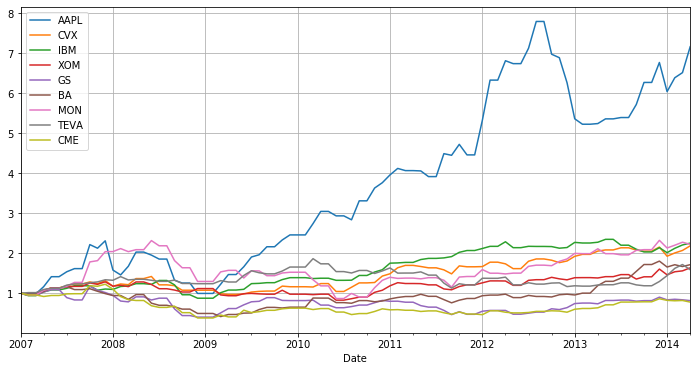

In [42]:
monthly_cr.plot(figsize=(12,6))
plt.grid()

# distribution of net_returns

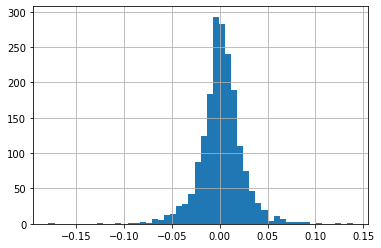

In [43]:
aapl = daily_pc["AAPL"]
aapl.hist(bins=50)

In [44]:
import seaborn as sns

In [45]:
net_returns[1:]

,AAPL,CVX,IBM,XOM,GS,BA,MON,TEVA,CME
1,0.022222,-0.009733,0.010697,-0.018644,-0.009350,0.004026,-0.017334,0.012132,0.007268
2,-0.007206,0.003822,-0.009072,0.007042,0.001037,-0.004277,0.008493,0.017799,0.004731
3,0.004921,0.012874,0.015258,-0.007969,0.023489,-0.002416,-0.013172,0.021056,0.010596
4,0.083119,-0.011636,0.011792,-0.007705,0.001704,-0.010495,-0.006783,-0.002097,0.005825
5,0.047807,-0.017207,-0.011769,-0.015364,0.019775,0.014414,-0.007050,0.002452,0.028608
6,-0.012296,-0.010321,-0.002428,0.000000,0.018088,-0.004826,0.003106,-0.008036,0.005968
7,-0.012340,0.024209,0.006954,0.023658,0.009984,-0.007947,0.023004,0.003170,0.031117
8,0.026205,-0.009818,0.014963,-0.014260,-0.001876,-0.001494,0.049297,0.004916,-0.007382
9,-0.022196,0.016526,-0.007938,0.011640,-0.001676,0.009383,0.010097,-0.000349,0.021435
10,-0.061928,0.001445,-0.005716,-0.006903,-0.016636,-0.009295,-0.003876,0.031807,-0.007709


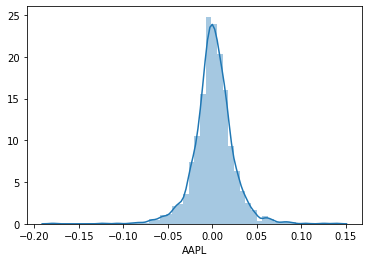

In [46]:
sns.distplot(net_returns.AAPL[1:])

# scatterplot matrix of all stocks daily changes

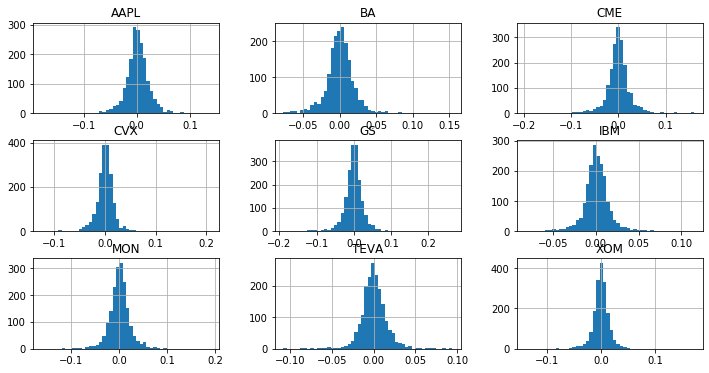

In [47]:
daily_pc.hist(bins=50,figsize=(12,6));

# moving average

In [48]:
close_px.AAPL

Date
2007-01-03     80.10
2007-01-04     81.88
2007-01-05     81.29
2007-01-08     81.69
2007-01-09     88.48
2007-01-10     92.71
2007-01-11     91.57
2007-01-12     90.44
2007-01-16     92.81
2007-01-17     90.75
2007-01-18     85.13
2007-01-19     84.59
2007-01-22     82.96
2007-01-23     81.91
2007-01-24     82.87
2007-01-25     82.44
2007-01-26     81.61
2007-01-29     82.14
2007-01-30     81.77
2007-01-31     81.94
2007-02-01     81.00
2007-02-02     81.01
2007-02-05     80.23
2007-02-06     80.43
2007-02-07     82.34
2007-02-08     82.37
2007-02-09     79.59
2007-02-12     81.13
2007-02-13     80.96
2007-02-14     81.53
               ...  
2014-04-04    528.87
2014-04-07    520.56
2014-04-08    520.53
2014-04-09    527.37
2014-04-10    520.57
2014-04-11    516.72
2014-04-14    518.78
2014-04-15    515.08
2014-04-16    516.13
2014-04-17    522.02
2014-04-21    528.22
2014-04-22    528.75
2014-04-23    521.84
2014-04-24    564.62
2014-04-25    568.76
2014-04-28    590.79
2014-04-

In [49]:
aapl_close = close_px.AAPL

In [50]:
ma_30 = aapl_close.rolling(window=30).mean()

In [51]:
ma_30[:5]

Date
2007-01-03   NaN
2007-01-04   NaN
2007-01-05   NaN
2007-01-08   NaN
2007-01-09   NaN
Name: AAPL, dtype: float64

In [53]:
ma_30.isna().sum()

29

In [54]:
ma_30[25:32]

Date
2007-02-08          NaN
2007-02-09          NaN
2007-02-12          NaN
2007-02-13          NaN
2007-02-14    83.655667
2007-02-15    83.700667
2007-02-16    83.674000
Name: AAPL, dtype: float64

In [55]:
ma_90 = aapl_close.rolling(window=90).mean()

In [56]:
type(ma_90)

pandas.core.series.Series

In [57]:
df2 = pd.DataFrame()

In [59]:
df2['Price'] = aapl_close

In [61]:
df2[:5]

,Price
Date,
2007-01-03,80.10
2007-01-04,81.88
2007-01-05,81.29
2007-01-08,81.69
2007-01-09,88.48


In [62]:
df2['30 days'] = ma_30

In [63]:
df2['90 days'] = ma_90

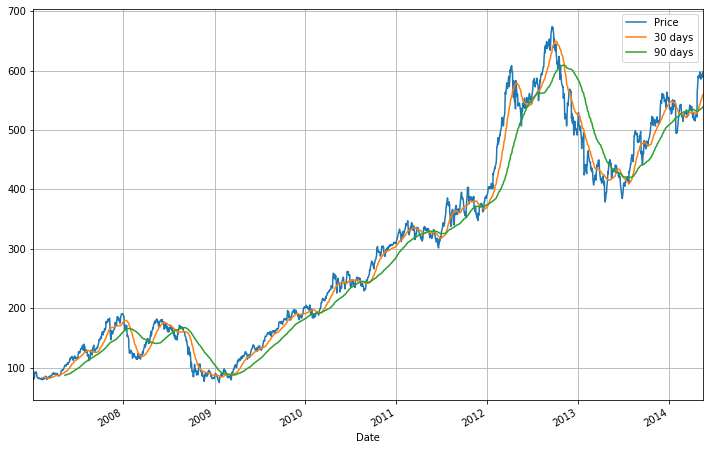

In [64]:
df2.plot(figsize=(12,8))
plt.grid()

In [65]:
df2

,Price,30 days,90 days
Date,,,
2007-01-03,80.10,NaN,NaN
2007-01-04,81.88,NaN,NaN
2007-01-05,81.29,NaN,NaN
2007-01-08,81.69,NaN,NaN
2007-01-09,88.48,NaN,NaN
2007-01-10,92.71,NaN,NaN
2007-01-11,91.57,NaN,NaN
2007-01-12,90.44,NaN,NaN
2007-01-16,92.81,NaN,NaN


# comparison of average daily returns across stocks

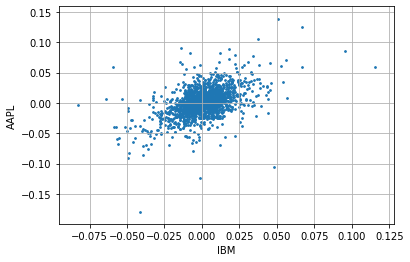

In [67]:
plt.scatter(daily_pc['IBM'], daily_pc["AAPL"],s=3)
plt.xlabel('IBM')
plt.ylabel('AAPL')
plt.grid()

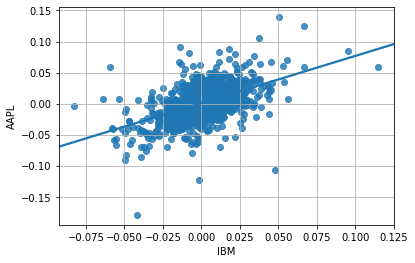

In [69]:
sns.regplot('IBM','AAPL',daily_pc,ci=None)
plt.grid()

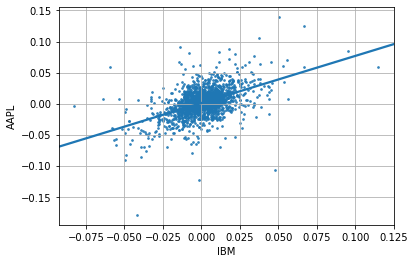

In [71]:
sns.regplot('IBM','AAPL',daily_pc,scatter_kws={'s':3},ci=None)
plt.grid()

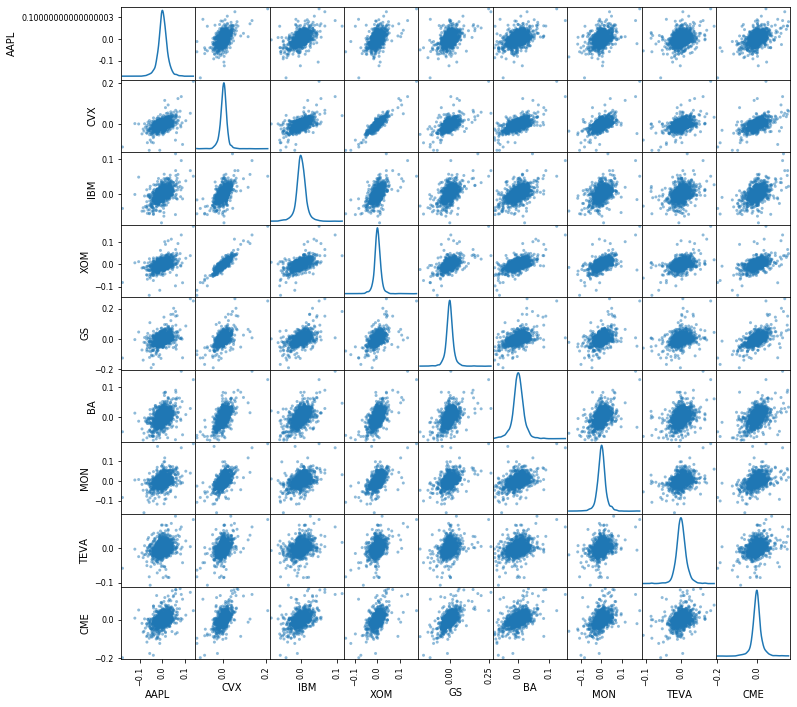

In [72]:
from pandas.plotting import scatter_matrix
scatter_matrix(daily_pc, diagonal='kde',figsize=(12,12));

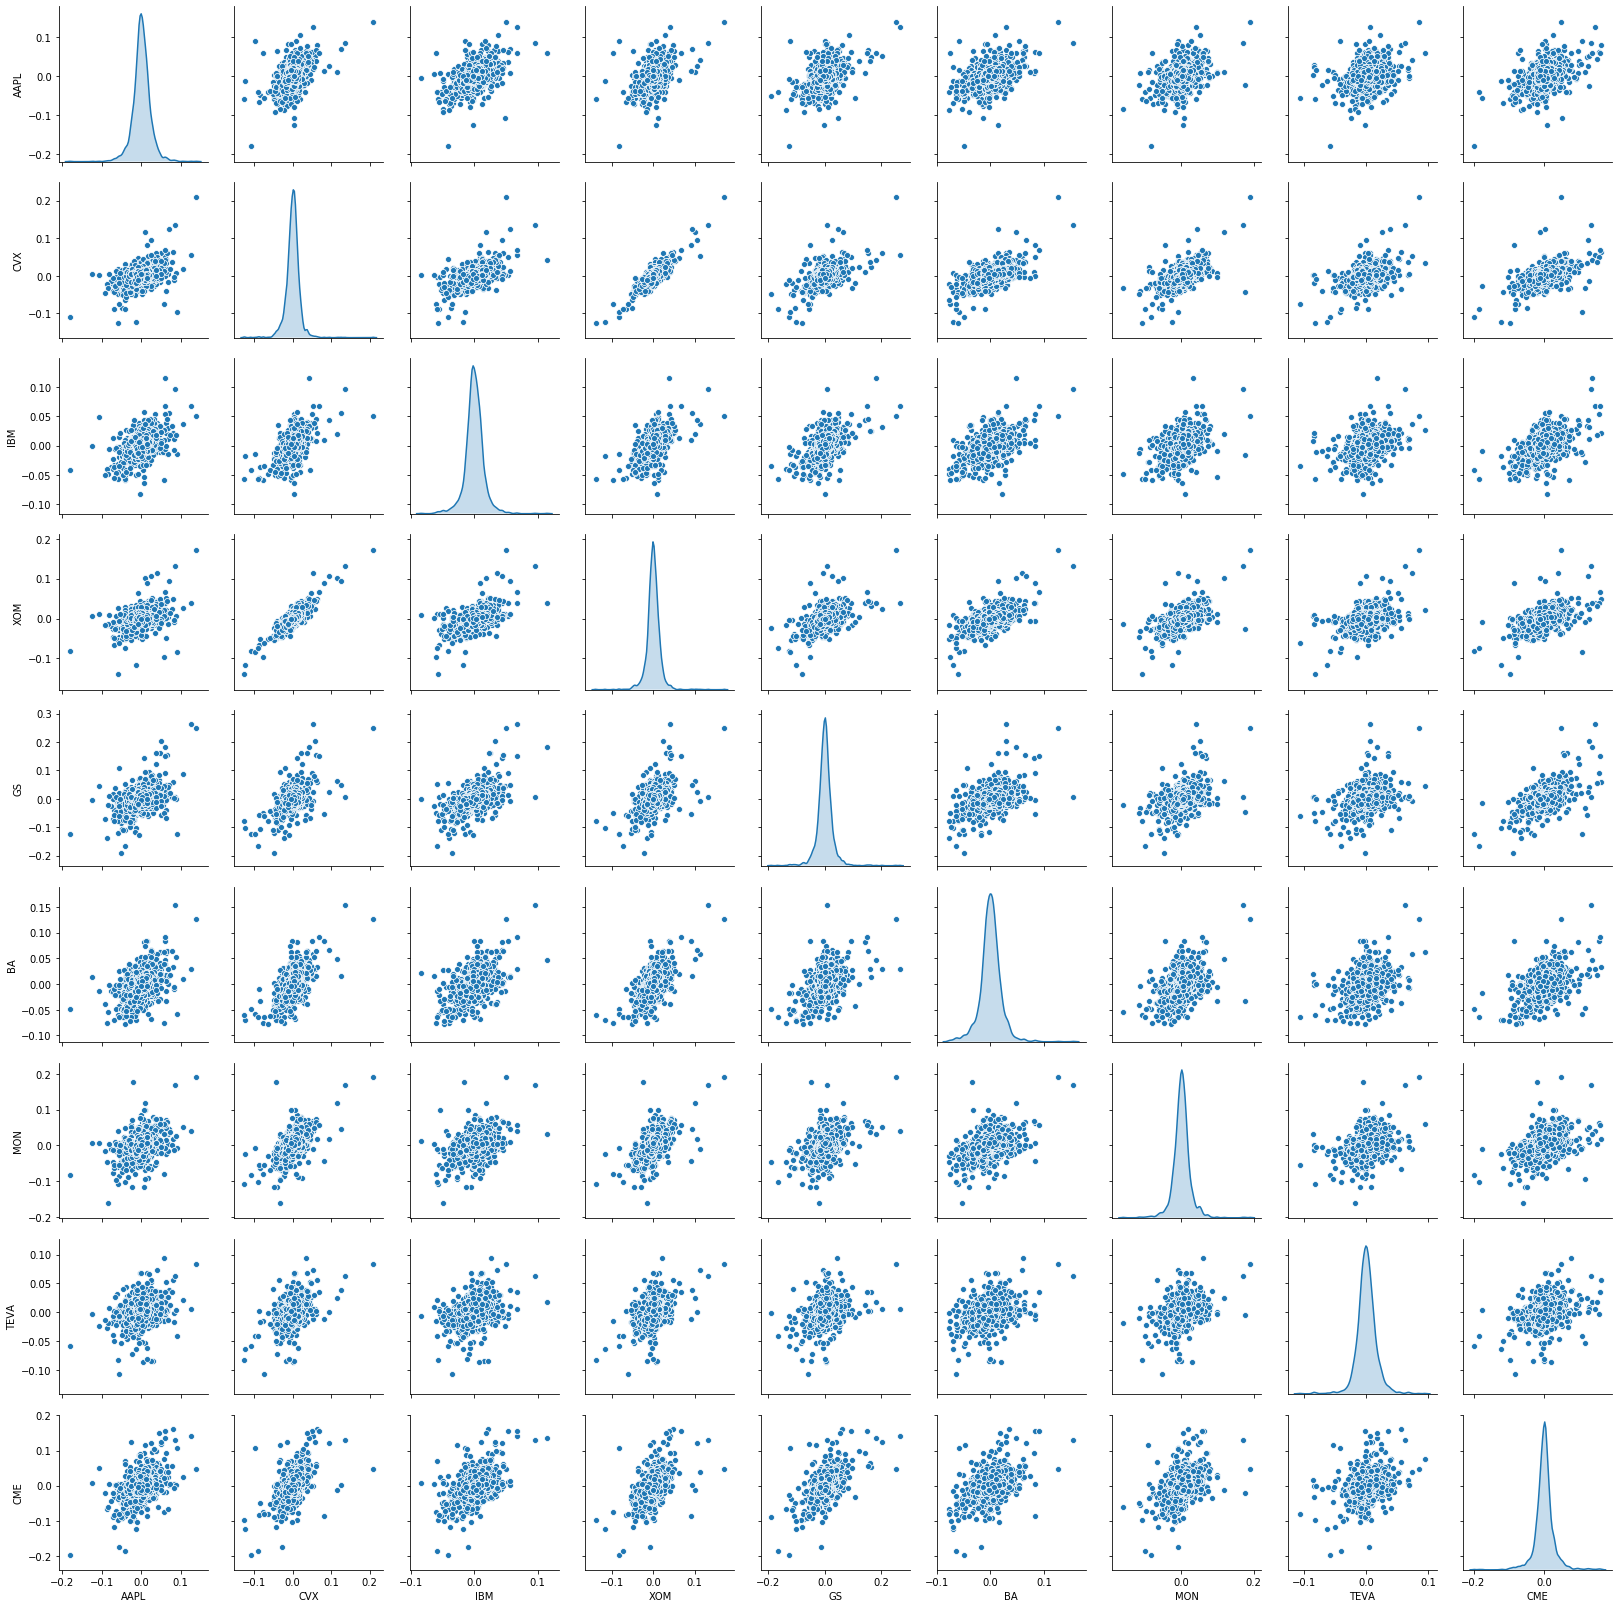

In [73]:
sns.pairplot(daily_pc[1:],diag_kind='kde')

In [74]:
corrs = daily_pc.corr()
corrs

,AAPL,CVX,IBM,XOM,GS,BA,MON,TEVA,CME
AAPL,1.000000,0.456904,0.498518,0.417021,0.443807,0.423143,0.378089,0.280000,0.438877
CVX,0.456904,1.000000,0.578675,0.891391,0.556398,0.600954,0.572509,0.421710,0.519904
IBM,0.498518,0.578675,1.000000,0.567176,0.523900,0.521691,0.420960,0.322133,0.490826
XOM,0.417021,0.891391,0.567176,1.000000,0.512322,0.597151,0.561446,0.410500,0.504945
GS,0.443807,0.556398,0.523900,0.512322,1.000000,0.495586,0.437285,0.314322,0.585788
BA,0.423143,0.600954,0.521691,0.597151,0.495586,1.000000,0.450401,0.347635,0.473719
MON,0.378089,0.572509,0.420960,0.561446,0.437285,0.450401,1.000000,0.316466,0.433014
TEVA,0.280000,0.421710,0.322133,0.410500,0.314322,0.347635,0.316466,1.000000,0.323164
CME,0.438877,0.519904,0.490826,0.504945,0.585788,0.473719,0.433014,0.323164,1.000000


In [75]:
corrs.values.min()

0.27999997186012904

# heatmap

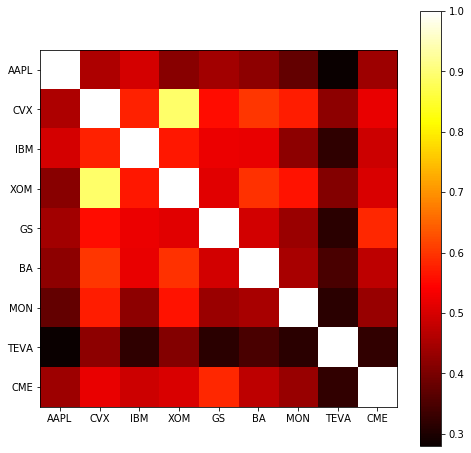

In [76]:
plt.imshow(corrs, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corrs)), corrs.columns)
plt.yticks(range(len(corrs)), corrs.columns)
plt.gcf().set_size_inches(8,8)

# moving averages of standard deviations

In [84]:
min_periods = 75

In [85]:
vol = daily_pc.rolling(window=min_periods).std()*np.sqrt(min_periods)

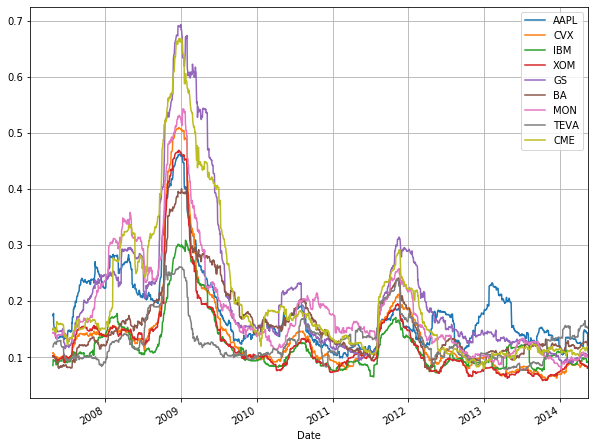

In [87]:
vol.plot(figsize=(10,8));
plt.grid()

# expected returns VS standard deviation of returns

In [88]:
values = daily_pc

In [89]:
values[:5]

,AAPL,CVX,IBM,XOM,GS,BA,MON,TEVA,CME
Date,,,,,,,,,
2007-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-04,0.022222,-0.009733,0.010697,-0.018644,-0.009350,0.004026,-0.017334,0.012132,0.007268
2007-01-05,-0.007206,0.003822,-0.009072,0.007042,0.001037,-0.004277,0.008493,0.017799,0.004731
2007-01-08,0.004921,0.012874,0.015258,-0.007969,0.023489,-0.002416,-0.013172,0.021056,0.010596
2007-01-09,0.083119,-0.011636,0.011792,-0.007705,0.001704,-0.010495,-0.006783,-0.002097,0.005825


In [90]:
df1 = pd.DataFrame([values.std(),values.mean()])

In [91]:
df1

,AAPL,CVX,IBM,XOM,GS,BA,MON,TEVA,CME
0,0.022421,0.018282,0.014743,0.016942,0.028434,0.019591,0.023791,0.015721,0.027333
1,0.001336,0.000596,0.000533,0.000403,0.000309,0.000495,0.000773,0.000450,0.000266


In [92]:
df1.index = ['standard deviation','mean']

In [93]:
df1

,AAPL,CVX,IBM,XOM,GS,BA,MON,TEVA,CME
standard deviation,0.022421,0.018282,0.014743,0.016942,0.028434,0.019591,0.023791,0.015721,0.027333
mean,0.001336,0.000596,0.000533,0.000403,0.000309,0.000495,0.000773,0.000450,0.000266


In [94]:
stdev = df1.iloc[0,:]

In [95]:
means = df1.iloc[1,:]

<function matplotlib.pyplot.grid(b=None, which='major', axis='both', **kwargs)>

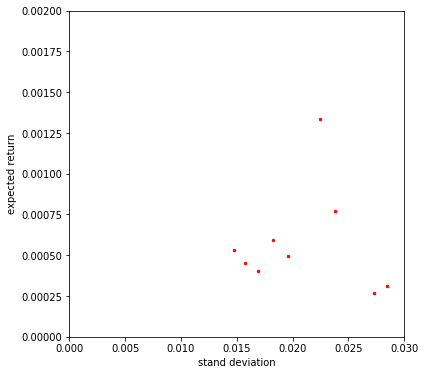

In [96]:
plt.figure(figsize=(6,6))
plt.scatter(stdev,means,s=6,color='r')
plt.ylabel('expected return')
plt.xlabel('stand deviation')
plt.ylim(0.000,0.002)
plt.xlim(0.0,0.030)
plt.grid

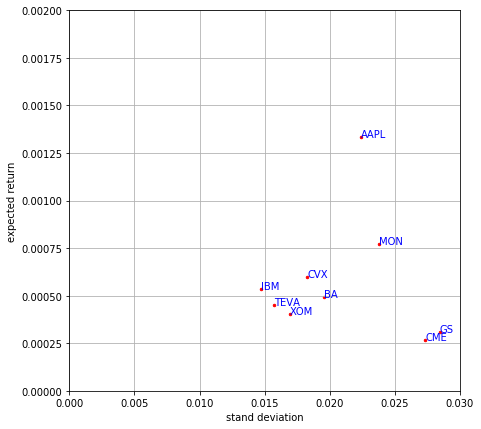

In [97]:
plt.figure(figsize=(7,7))
plt.scatter(stdev,means,s=6,color='r')
plt.ylabel('expected return')
plt.xlabel('stand deviation')
plt.ylim(0.000,0.002)
plt.xlim(0.0,0.030)
plt.grid()

for ticker,x,y in zip(df1.columns,stdev,means):
    plt.annotate(ticker, xy = (x,y),color = 'b')